## Voda Darian-Florian - KNN Algorithm on load_data.csv dataset

## Import libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

## Import dataset

In [19]:
df = pd.read_csv(r"C:\Users\daria\PycharmProjects\StatisticsAppDS\loan_data.csv")
print(f'data shape: {df.shape}')
df.head(5)

data shape: (500, 11)


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


## Exploratory Data Analysis (EDA)

In [20]:
df.describe()

,Loan_ID,Principal,terms,past_due_days,age
count,5.000000e+02,500.000000,500.000000,200.00000,500.000000
mean,2.110948e+07,943.200000,22.824000,36.01000,31.116000
std,7.621265e+06,115.240274,8.000064,29.38088,6.084784
min,1.216016e+07,300.000000,7.000000,1.00000,18.000000
25%,2.016013e+07,1000.000000,15.000000,3.00000,27.000000
50%,2.016026e+07,1000.000000,30.000000,37.00000,30.000000
75%,2.016039e+07,1000.000000,30.000000,60.00000,35.000000
max,9.116029e+07,1000.000000,30.000000,76.00000,51.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    int64  
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 43.1+ KB


In [22]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

There are 100 NULL values for paid_off_time feature, and 300 NULL values for past_due_days feature

But we still don't care, since this feature is not an important one for our analysis, so we will take care of this like dictators did to opposition.

In [23]:
# Describe each feature grouped by gender
df.groupby(['Gender']).describe()

Loan_ID                                                      \
         count          mean           std         min         25%   
Gender                                                               
female    77.0  2.290072e+07  1.376049e+07  12160159.0  20160134.0   
male     423.0  2.078341e+07  5.821404e+06  20110409.0  20160135.5   

                                           Principal              ...  \
               50%         75%         max     count        mean  ...   
Gender                                                            ...   
female  20160250.0  20160393.0  91160291.0      77.0  945.454545  ...   
male    20160269.0  20160394.5  90163093.0     423.0  942.789598  ...   

       past_due_days          age                                         \
                 75%   max  count       mean       std   min   25%   50%   
Gender                                                                     
female          59.0  75.0   77.0  31.883117  6.702266  19.0  27.0  31.0   
male            60.0  76.0  423.0  30.976359  5.963507  18.0  27.0  30.0   

                    
         75%   max  
Gender              
female  35.0  50.0  
male    35.0  51.0  

[2 rows x 40 columns]

Text(0.5, 1.0, 'Boxplot of age')

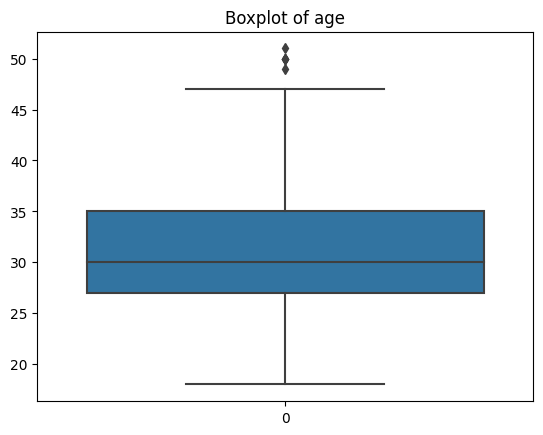

In [24]:
sns.boxplot(df['age'])
plt.title("Boxplot of age")

Text(0.5, 1.0, 'Distribution of loan status')

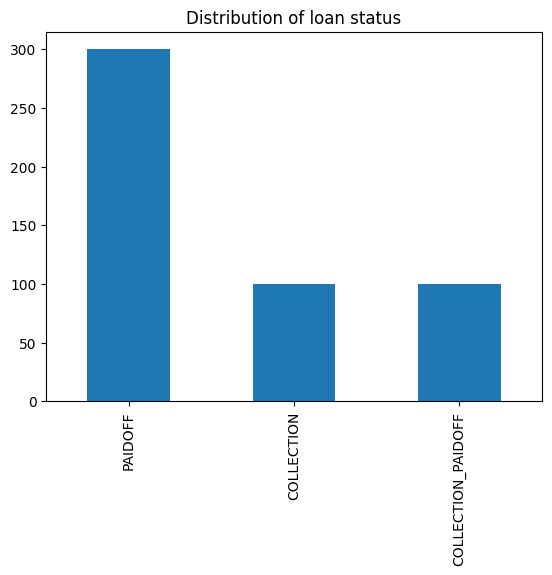

In [25]:
df['loan_status'].value_counts().plot(kind='bar')
plt.title("Distribution of loan status")

## Preprocessing

In [26]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


Check the number of unique variable for the loan_status feature

In [27]:
loan_status = set(df['loan_status'])
loan_status

{'COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF'}

We have two choices:
- Put COLLECTION_PAIDOFF into PAIDOFF group
- Put COLLECTION_PAIDOFF into NOT PAIDOFF group

Let's try both of them, since I consider that people always need a second chance and also maybe sometimes not.

We'll replace the COLLECTION_PAIDOFF to PAIDOFF name in order to do the first option

#### COLLECTION_PAIDOFF = PAIDOFF

In [28]:
df_collection_paidoff = df.copy()
df_collection_paidoff['loan_status'] = df_collection_paidoff['loan_status'].replace('COLLECTION_PAIDOFF', 'PAIDOFF')

set(df_collection_paidoff['loan_status'])

{'COLLECTION', 'PAIDOFF'}

#### COLLECTION_PAIDOFF != PAIDOFF

In [29]:
df_collection_not_paidoff = df.copy()
df_collection_not_paidoff['loan_status'] = df_collection_not_paidoff['loan_status'].replace('COLLECTION_PAIDOFF', 'COLLECTION')

set(df_collection_not_paidoff['loan_status'])

{'COLLECTION', 'PAIDOFF'}

Even though doing this, the gap between the PAIDOFF and NOT PAIDOFF customers is growing bigger and bigger for the first experiment, the second one tends to balance the distribution.

#### COLLECTION_PAIDOFF = PAIDOFF

Text(0.5, 1.0, 'Distribution of loan status')

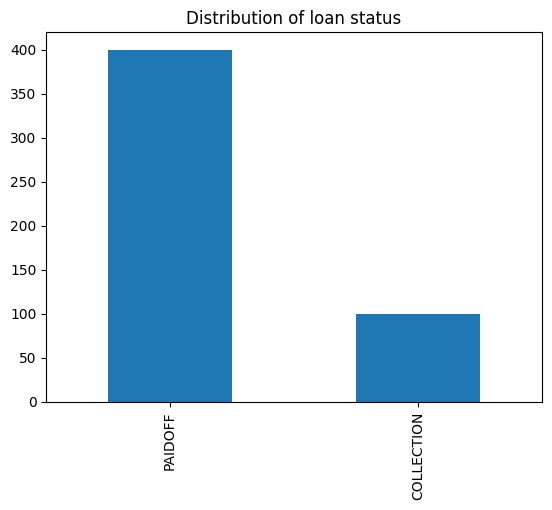

In [30]:
df_collection_paidoff['loan_status'].value_counts().plot(kind='bar')
plt.title("Distribution of loan status")

#### COLLECTION_PAIDOFF != PAIDOFF

Text(0.5, 1.0, 'Distribution of loan status')

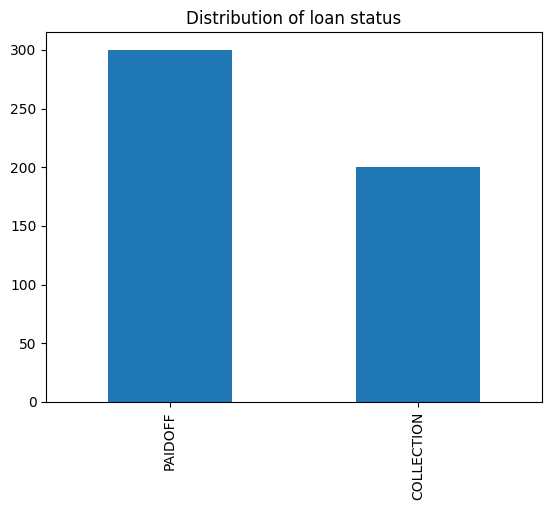

In [31]:
df_collection_not_paidoff['loan_status'].value_counts().plot(kind='bar')
plt.title("Distribution of loan status")

But we will stick to the plan, for now.
We will get rid of the unuseful features now.

Useless features for analysis (but useful for EDA/decision taking):
- Dates
- Features with many null values
- ID

In [32]:
df_collection_paidoff = df_collection_paidoff.drop(columns=[ 'Loan_ID','effective_date', 'due_date', 'past_due_days', 'paid_off_time'])
df_collection_not_paidoff = df_collection_not_paidoff.drop(columns=[ 'Loan_ID','effective_date', 'due_date', 'past_due_days', 'paid_off_time'])

Print one of the DataFrames in order to see how it looks now.

In [370]:
df_collection_paidoff

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,50,Bechalor,female
2,PAIDOFF,1000,30,33,Bechalor,female
3,PAIDOFF,1000,15,27,college,male
4,PAIDOFF,1000,30,28,college,female
...,...,...,...,...,...,...
495,PAIDOFF,1000,30,28,High School or Below,male
496,PAIDOFF,1000,15,26,High School or Below,male
497,PAIDOFF,800,15,30,college,male
498,PAIDOFF,1000,30,38,college,female


Now looks better

Now let's try to encode the categorical and nominal features.

Categorical features:
- education

Nominal feature:
- Gender
- loan_status

Now we are going to encode the Nominal features using One Hot Encoder and simple binary encoding for each case.

In [33]:
# Gender One Hot Encoding
oe_style = OneHotEncoder()
df_collection_paidoff['Gender'] = oe_style.fit_transform(df_collection_paidoff[["Gender"]]).toarray()

# loan status Encoding
oe_style_3 = {"PAIDOFF": 1, "COLLECTION": 0}
df_collection_paidoff['loan_status'] = df_collection_paidoff["loan_status"].replace(oe_style_3)
df_collection_paidoff

,loan_status,Principal,terms,age,education,Gender
0,1,1000,30,45,High School or Below,0.0
1,1,1000,30,50,Bechalor,1.0
2,1,1000,30,33,Bechalor,1.0
3,1,1000,15,27,college,0.0
4,1,1000,30,28,college,1.0
...,...,...,...,...,...,...
495,1,1000,30,28,High School or Below,0.0
496,1,1000,15,26,High School or Below,0.0
497,1,800,15,30,college,0.0
498,1,1000,30,38,college,1.0


In [34]:
# Gender One Hot Encoding
oe_style = OneHotEncoder()
df_collection_not_paidoff['Gender'] = oe_style.fit_transform(df_collection_not_paidoff[["Gender"]]).toarray()

# loan status Encoding
oe_style_3 = {"PAIDOFF": 1, "COLLECTION": 0}
df_collection_not_paidoff['loan_status'] = df_collection_not_paidoff["loan_status"].replace(oe_style_3)
df_collection_not_paidoff

,loan_status,Principal,terms,age,education,Gender
0,1,1000,30,45,High School or Below,0.0
1,1,1000,30,50,Bechalor,1.0
2,1,1000,30,33,Bechalor,1.0
3,1,1000,15,27,college,0.0
4,1,1000,30,28,college,1.0
...,...,...,...,...,...,...
495,0,1000,30,28,High School or Below,0.0
496,0,1000,15,26,High School or Below,0.0
497,0,800,15,30,college,0.0
498,0,1000,30,38,college,1.0


And now we encode the categorical one using a label encoding for each case

In [36]:
# education Encoding
oe_style_3 = {"High School or Below": 1, "college": 2, "Bechalor": 3, "Master or Above": 4}
df_collection_paidoff['education'] = df_collection_paidoff["education"].replace(oe_style_3)
df_collection_paidoff

,loan_status,Principal,terms,age,education,Gender
0,1,1000,30,45,1,0.0
1,1,1000,30,50,3,1.0
2,1,1000,30,33,3,1.0
3,1,1000,15,27,2,0.0
4,1,1000,30,28,2,1.0
...,...,...,...,...,...,...
495,1,1000,30,28,1,0.0
496,1,1000,15,26,1,0.0
497,1,800,15,30,2,0.0
498,1,1000,30,38,2,1.0


In [38]:
# education Encoding
oe_style_3 = {"High School or Below": 1, "college": 2, "Bechalor": 3, "Master or Above": 4}
df_collection_not_paidoff['education'] = df_collection_not_paidoff["education"].replace(oe_style_3)
df_collection_not_paidoff

,loan_status,Principal,terms,age,education,Gender
0,1,1000,30,45,1,0.0
1,1,1000,30,50,3,1.0
2,1,1000,30,33,3,1.0
3,1,1000,15,27,2,0.0
4,1,1000,30,28,2,1.0
...,...,...,...,...,...,...
495,0,1000,30,28,1,0.0
496,0,1000,15,26,1,0.0
497,0,800,15,30,2,0.0
498,0,1000,30,38,2,1.0


Now we have to scale the data.

In [373]:
scaler = MinMaxScaler()

df_collection_paidoff.loc[:,['Principal', 'terms','age']] = scaler.fit_transform(df_collection_paidoff[['Principal', 'terms', 'age']])
df_collection_paidoff

,loan_status,Principal,terms,age,education,Gender
0,1,1.000000,1.000000,0.818182,1,0.0
1,1,1.000000,1.000000,0.969697,3,1.0
2,1,1.000000,1.000000,0.454545,3,1.0
3,1,1.000000,0.347826,0.272727,2,0.0
4,1,1.000000,1.000000,0.303030,2,1.0
...,...,...,...,...,...,...
495,1,1.000000,1.000000,0.303030,1,0.0
496,1,1.000000,0.347826,0.242424,1,0.0
497,1,0.714286,0.347826,0.363636,2,0.0
498,1,1.000000,1.000000,0.606061,2,1.0


In [40]:
scaler = MinMaxScaler()

df_collection_not_paidoff.loc[:,['Principal', 'terms','age']] = scaler.fit_transform(df_collection_not_paidoff[['Principal', 'terms', 'age']])
df_collection_not_paidoff

,loan_status,Principal,terms,age,education,Gender
0,1,1.000000,1.000000,0.818182,1,0.0
1,1,1.000000,1.000000,0.969697,3,1.0
2,1,1.000000,1.000000,0.454545,3,1.0
3,1,1.000000,0.347826,0.272727,2,0.0
4,1,1.000000,1.000000,0.303030,2,1.0
...,...,...,...,...,...,...
495,0,1.000000,1.000000,0.303030,1,0.0
496,0,1.000000,0.347826,0.242424,1,0.0
497,0,0.714286,0.347826,0.363636,2,0.0
498,0,1.000000,1.000000,0.606061,2,1.0


## Train/Test Splitting

We are using the train/split method for each case with train batch size of 30%

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_collection_paidoff.loc[:, df_collection_paidoff.columns != "loan_status"], df_collection_paidoff["loan_status"], test_size=0.30, random_state=420)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_collection_not_paidoff.loc[:, df_collection_not_paidoff.columns != "loan_status"], df_collection_not_paidoff["loan_status"], test_size=0.30, random_state=69)

## Logistic regression

Let's create a logistic regression using sklearn and see the accuracy on train and test set

#### COLLECTION_PAIDOFF = PAIDOFF

In [57]:
model_logistic = LogisticRegression(random_state=69).fit(X_train, y_train)
predict_logistic=model_logistic.predict(X_test)
train_score = model_logistic.score(X_train, y_train)
test_score = model_logistic.score(X_test, y_test)

print(f"Train score is: {train_score} versus test score which is: {test_score}")

Train score is: 0.7885714285714286 versus test score which is: 0.8266666666666667


![Alt text](https://i.kym-cdn.com/entries/icons/original/000/031/260/Screen_Shot_2019-09-24_at_4.22.16_PM.png)

#### COLLECTION_PAIDOFF != PAIDOFF

In [80]:
model_logistic2 = LogisticRegression(random_state=6969).fit(X_train2, y_train2)
predict_logistic2 = model_logistic2.predict(X_test2)
train_score2 = model_logistic2.score(X_train2, y_train2)
test_score2 = model_logistic2.score(X_test2, y_test2)

print(f"Train score is: {train_score2} versus test score which is: {test_score2}")

Train score is: 0.5828571428571429 versus test score which is: 0.6333333333333333


## KNN Algorithm

We will choose the features for calculating the distance as the following ones:
- Principal
- Term

I don't see the age or other features more relevant than this.

The algorithm works as following:
* Creates a list of final predictions for each label
* Creates a new column with ground truth in the DataFrame
* Iterates over the Principal and terms features on X_test_param in order to find all the distances of that specific point
* Iterates over the Principal and terms features on X_train_param in order to compute all the distances
* Iterates over the distances computed in order to see which distance is closer and when reached to K distances, we check which major label is present. (take first label in case of equality)
* Add the predicted label in the predictions list and return the list

In [46]:
# calculate Euclidean distance
def Distance2Point(point1, point2):
    dis = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return dis

In [47]:
def KNN_voda(X_train_param, y_train_param, X_test_param, K):
    predictions = []
    X_train_param['Class'] = y_train_param
    for i, m in zip(X_test_param['Principal'], X_test_param['terms']):
        counter = {"PAIDOFF": 0, "COLLECTION": 0}
        distance = []
        for j, n in zip(X_train_param['Principal'], X_train_param['terms']):
            point1 = [i, m]
            point2 = [j, n]
            distance.append(Distance2Point(point1, point2))
        X_train_param['distance'] = distance

        computed_distance = X_train_param.sort_values(by=['distance'], ascending=True).copy()
        for i in computed_distance['Class']:
            total_sum = counter['PAIDOFF'] + counter['COLLECTION']
            if total_sum == K:
                break
            if i == 1:
                counter['PAIDOFF'] += 1
            elif i == 0:
                counter['COLLECTION'] += 1
        if counter['PAIDOFF']>=counter['COLLECTION']:
            predictions.append(1)
        else:
            predictions.append(0)

    return predictions
first_predict = KNN_voda(X_train, y_train, X_test, K=5)
first_predict

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [49]:
second_predict = KNN_voda(X_train2, y_train2, X_test2, K=5)
second_predict

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0]

In [385]:
y_test

399    0
1      1
199    1
497    1
383    0
      ..
130    1
275    1
364    0
490    1
329    0
Name: Class, Length: 150, dtype: int64

In [48]:
y_test2

481    0
130    1
173    1
162    1
0      1
      ..
375    0
159    1
204    1
341    0
6      1
Name: loan_status, Length: 150, dtype: int64

## Checking accuracy for the KNN Algorithm

#### COLLECTION_PAIDOFF = PAIDOFF

In [62]:
def check_score(predictions, y_test):
    confusion_matrix = {'FN': 0.0, 'FP': 0.0, 'TN': 0.0, 'TP': 0.0}
    for i, j in zip(predictions, y_test):
        if i == 0 and j == 0:
            confusion_matrix['TN'] += 1
        elif i == 0 and j == 1:
            confusion_matrix['FP'] += 1
        elif i == 1 and j == 0:
            confusion_matrix['FN'] += 1
        elif i == 1 and j == 1:
            confusion_matrix['TP'] += 1
    return confusion_matrix
first_result = check_score(first_predict, y_test)
print(first_result)
print(f"Accuracy: {(first_result['TP']+first_result['TN'])/(first_result['TP']+first_result['TN']+first_result['FP']+first_result['FN'])}")

{'FN': 26.0, 'FP': 0.0, 'TN': 0.0, 'TP': 124.0}
Accuracy: 0.8266666666666667


#### COLLECTION_PAIDOFF != PAIDOFF

In [61]:
second_result = check_score(second_predict, y_test2)
print(second_result)
print(f"Accuracy: {(second_result['TP']+second_result['TN'])/(second_result['TP']+second_result['TN']+second_result['FP']+second_result['FN'])}")

{'FN': 21.0, 'FP': 50.0, 'TN': 34.0, 'TP': 45.0}
Accuracy: 0.5266666666666666


## Decision Tree

In [51]:
y_train = y_train.rename('Class')

y_test = y_test.rename('Class')

y_train2 = y_train2.rename('Class')

y_test2 = y_test2.rename('Class')

In [52]:
X_train = X_train.drop(columns=['distance', 'Class'])

X_train2 = X_train2.drop(columns=['distance', 'Class'])

In [53]:
X_train

,Principal,terms,age,education,Gender
460,800,15,38,3,0.0
371,1000,30,18,2,0.0
333,1000,30,30,1,1.0
80,1000,30,28,1,0.0
472,800,15,33,2,0.0
...,...,...,...,...,...
287,1000,30,38,1,1.0
63,1000,30,45,2,0.0
390,1000,15,30,2,0.0
72,1000,30,33,3,1.0


In [54]:
X_test

,Principal,terms,age,education,Gender
399,1000,30,26,2,0.0
1,1000,30,50,3,1.0
199,1000,30,29,2,0.0
497,800,15,30,2,0.0
383,1000,30,26,1,0.0
...,...,...,...,...,...
130,1000,15,26,1,0.0
275,800,15,44,2,0.0
364,800,15,22,2,0.0
490,1000,30,38,1,0.0


#### COLLECTION_PAIDOFF = PAIDOFF

In [73]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()



# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.64


#### COLLECTION_PAIDOFF != PAIDOFF

In [74]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2_dt = clf2.predict(X_test2)

print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2_dt))

Accuracy: 0.44


## RESULTS

The results are quite very very interesting.

#### COLLECTION_PAIDOFF = PAIDOFF

In [64]:
first_result = check_score(first_predict, y_test)
print(first_result)
print(f"KNN Accuracy: {(first_result['TP']+first_result['TN'])/(first_result['TP']+first_result['TN']+first_result['FP']+first_result['FN'])}")
print(f"KNN Precision: {(first_result['TP'])/(first_result['TP']+first_result['FP'])}")
print(f"KNN Recall: {(first_result['TP'])/(first_result['TP']+first_result['FN'])}")
print(f"KNN F1-Score: {(first_result['TP'])/(first_result['TP']+(0.5*(first_result['FN']+first_result['FP'])))}")

{'FN': 26.0, 'FP': 0.0, 'TN': 0.0, 'TP': 124.0}
KNN Accuracy: 0.8266666666666667
KNN Precision: 1.0
KNN Recall: 0.8266666666666667
KNN F1-Score: 0.9051094890510949


In [71]:
accuracy_score = metrics.accuracy_score(y_test, predict_logistic)
precision_score = metrics.precision_score(y_test, predict_logistic)
recall_score = metrics.recall_score(y_test, predict_logistic)
f1_score = metrics.recall_score(y_test, predict_logistic)

In [72]:
print(f"Sklearn Logistic Regression Accuracy: {accuracy_score}")
print(f"Sklearn Logistic Regression Precision: {precision_score}")
print(f"Sklearn Logistic Regression Recall: {recall_score}")
print(f"Sklearn Logistic Regression F1-Score: {f1_score}")

Sklearn Logistic Regression Accuracy: 0.8266666666666667
Sklearn Logistic Regression Precision: 0.8266666666666667
Sklearn Logistic Regression Recall: 1.0
Sklearn Logistic Regression F1-Score: 1.0


In [75]:
accuracy_score_dt = metrics.accuracy_score(y_test, y_pred_dt)
precision_score_dt = metrics.precision_score(y_test, y_pred_dt)
recall_score_dt = metrics.recall_score(y_test, y_pred_dt)
f1_score_dt = metrics.recall_score(y_test, y_pred_dt)

In [83]:
print(f"Sklearn Decision Tree Accuracy: {accuracy_score_dt}")
print(f"Sklearn Decision Tree Precision: {precision_score_dt}")
print(f"Sklearn Decision Tree Recall: {recall_score_dt}")
print(f"Sklearn Decision Tree F1-Score: {f1_score_dt}")

Sklearn Decision Tree Accuracy: 0.64
Sklearn Decision Tree Precision: 0.8017241379310345
Sklearn Decision Tree Recall: 0.75
Sklearn Decision Tree F1-Score: 0.75


#### COLLECTION_PAIDOFF != PAIDOFF

In [77]:
second_result = check_score(second_predict, y_test)
print(second_result)
print(f"KNN Accuracy: {(second_result['TP']+second_result['TN'])/(second_result['TP']+second_result['TN']+second_result['FP']+second_result['FN'])}")
print(f"KNN Precision: {(second_result['TP'])/(second_result['TP']+second_result['FP'])}")
print(f"KNN Recall: {(second_result['TP'])/(second_result['TP']+second_result['FN'])}")
print(f"KNN F1-Score: {(second_result['TP'])/(second_result['TP']+(0.5*(second_result['FN']+second_result['FP'])))}")

{'FN': 10.0, 'FP': 68.0, 'TN': 16.0, 'TP': 56.0}
KNN Accuracy: 0.48
KNN Precision: 0.45161290322580644
KNN Recall: 0.8484848484848485
KNN F1-Score: 0.5894736842105263


In [82]:
accuracy_score_2 = metrics.accuracy_score(y_test2, predict_logistic2)
precision_score_2 = metrics.precision_score(y_test2, predict_logistic2)
recall_score_2 = metrics.recall_score(y_test2, predict_logistic2)
f1_score_2 = metrics.recall_score(y_test2, predict_logistic2)
print(f"Sklearn Logistic Regression Accuracy: {accuracy_score_2}")
print(f"Sklearn Logistic Regression Precision: {precision_score_2}")
print(f"Sklearn Logistic Regression Recall: {recall_score_2}")
print(f"Sklearn Logistic Regression F1-Score: {f1_score_2}")

Sklearn Logistic Regression Accuracy: 0.6333333333333333
Sklearn Logistic Regression Precision: 0.6333333333333333
Sklearn Logistic Regression Recall: 1.0
Sklearn Logistic Regression F1-Score: 1.0


In [85]:
accuracy_score_2_dt = metrics.accuracy_score(y_test2, y_pred2_dt)
precision_score_2_dt = metrics.precision_score(y_test2, y_pred2_dt)
recall_score_2_dt = metrics.recall_score(y_test2, y_pred2_dt)
f1_score_2_dt = metrics.recall_score(y_test2, y_pred2_dt)
print(f"Sklearn Logistic Regression Accuracy: {accuracy_score_2_dt}")
print(f"Sklearn Logistic Regression Precision: {precision_score_2_dt}")
print(f"Sklearn Logistic Regression Recall: {recall_score_2_dt}")
print(f"Sklearn Logistic Regression F1-Score: {f1_score_2_dt}")

Sklearn Logistic Regression Accuracy: 0.44
Sklearn Logistic Regression Precision: 0.5733333333333334
Sklearn Logistic Regression Recall: 0.45263157894736844
Sklearn Logistic Regression F1-Score: 0.45263157894736844


|            Method           |              Case             |  Accuracy  |  Precision |   Recall   |  F1-Score  |
|:---------------------------:|:-----------------------------:|:----------:|:----------:|:----------:|:----------:|
|           Voda KNN          |  COLLECTION_PAIDOFF = PAIDOFF | 0.82666666 |     1.0    | 0.82666666 | 0.90510948 |
| Sklearn Logistic Regression |  COLLECTION_PAIDOFF = PAIDOFF | 0.82666666 | 0.82666666 |     1.0    |     1.0    |
|    Sklearn Decision Tree    |  COLLECTION_PAIDOFF = PAIDOFF |    0.64    | 0.80172413 |    0.75    |    0.75    |
|           Voda KNN          | COLLECTION_PAIDOFF != PAIDOFF |    0.48    | 0.45161290 | 0.84848484 | 0.58947368 |
| Sklearn Logistic Regression | COLLECTION_PAIDOFF != PAIDOFF | 0.63333333 | 0.63333333 |     1.0    |     1.0    |
|    Sklearn Decision Tree    | COLLECTION_PAIDOFF != PAIDOFF |    0.44    | 0.57333333 | 0.45263157 | 0.45263157 |

## Conclusions on each model

* Voda KNN
  * Voda's KNN algorithm tends to work in the same manner as Sklearn Logistic regression w.r.t performance, but when the dataset is balanced then Sklearn outperforms Voda's KNN algorithm, maybe due to more efficient and more logical decisions and maybe also there were took other than 2 features for computing the distance.
  * With respect to the Decision Tree, Voda's KNN algorithm outperforms Decision Tree algorithm from any perspective
* Sklearn Logistic Regression
    * This algorithm performs a good performance on each type of dataset (balanced and imbalanced), even though the number of features and the diversity of the data is not that much
* Sklearn Decision Tree
    * This algorithms doesn't perform well when we have binary or not well distributed data, it quite tends to underfit the prediction since there are not so many features to analyze and not so many decisions to take.